In [1]:
import pandas as pd
import requests
from bs4 import BeautifulSoup

In [2]:
url = 'https://www.flipkart.com/apple-iphone-15-plus-green-128-gb/product-reviews/itmaa50abb5e6c3b?pid=MOBGTAGPJVGHTAYC&lid=LSTMOBGTAGPJVGHTAYCV2RJGH&marketplace=FLIPKART'

In [3]:
requests.get(url)

<Response [200]>

In [4]:
headers = {
    "User-Agent": "Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/118.0.0.0 Safari/537.36",
    "Referer": "https://www.flipkart.com/",
    "Accept-Language": "en-US,en;q=0.9",
    "Accept-Encoding": "gzip, deflate, br",
    "Connection": "keep-alive",
    "Upgrade-Insecure-Requests": "1",
}

In [5]:
requests.get(url, headers=headers)

<Response [200]>

In [6]:
requests.get(url, headers=headers).text

'<!doctype html><html lang="en"><head><link href="https://rukminim2.flixcart.com" rel="preconnect"/><link rel="stylesheet" href="//static-assets-web.flixcart.com/fk-p-linchpin-web/fk-cp-zion/css/atlas.chunk.8dd48d.css"/><link rel="stylesheet" href="//static-assets-web.flixcart.com/fk-p-linchpin-web/fk-cp-zion/css/app_modules.chunk.c48a12.css"/><link rel="stylesheet" href="//static-assets-web.flixcart.com/fk-p-linchpin-web/fk-cp-zion/css/app.chunk.1def6f.css"/><meta http-equiv="Content-type" content="text/html; charset=utf-8"/><meta http-equiv="X-UA-Compatible" content="IE=Edge"/><meta property="fb:page_id" content="102988293558"/><meta property="fb:admins" content="658873552,624500995,100000233612389"/><link rel="shortcut icon" href="https://static-assets-web.flixcart.com/www/promos/new/20150528-140547-favicon-retina.ico"/><link type="application/opensearchdescription+xml" rel="search" href="/osdd.xml?v=2"/><meta property="og:type" content="website"/><meta name="og_site_name" property=

In [7]:
webpage = requests.get(url, headers=headers).text

In [8]:
soup = BeautifulSoup(webpage,'lxml')

In [9]:
#!pip install lxml

In [10]:
soup

<!DOCTYPE html>
<html lang="en"><head><link href="https://rukminim2.flixcart.com" rel="preconnect"/><link href="//static-assets-web.flixcart.com/fk-p-linchpin-web/fk-cp-zion/css/atlas.chunk.8dd48d.css" rel="stylesheet"/><link href="//static-assets-web.flixcart.com/fk-p-linchpin-web/fk-cp-zion/css/app_modules.chunk.c48a12.css" rel="stylesheet"/><link href="//static-assets-web.flixcart.com/fk-p-linchpin-web/fk-cp-zion/css/app.chunk.1def6f.css" rel="stylesheet"/><meta content="text/html; charset=utf-8" http-equiv="Content-type"/><meta content="IE=Edge" http-equiv="X-UA-Compatible"/><meta content="102988293558" property="fb:page_id"/><meta content="658873552,624500995,100000233612389" property="fb:admins"/><link href="https://static-assets-web.flixcart.com/www/promos/new/20150528-140547-favicon-retina.ico" rel="shortcut icon"/><link href="/osdd.xml?v=2" rel="search" type="application/opensearchdescription+xml"/><meta content="website" property="og:type"/><meta content="Flipkart.com" name="

In [11]:
temp = []

for i in soup.find_all('p',class_='z9E0IG'):
    temp.append(i.text.strip())

In [12]:
# page 1 ka all reviews. Next page 2 ka url='' paste and same process karna padega.
temp

['Best in the market!',
 'Great product',
 'Must buy!',
 'Delightful',
 'Best in the market!',
 'Mind-blowing purchase',
 'Perfect product!',
 'Must buy!',
 'Terrific',
 'Best in the market!']

## Web Scrapping Code 

In [21]:
import pandas as pd
import requests
from bs4 import BeautifulSoup

# Base URL for the product's reviews page (without the page number)
base_url = "https://www.flipkart.com/apple-iphone-15-plus-green-128-gb/product-reviews/itmaa50abb5e6c3b?pid=MOBGTAGPJVGHTAYC&lid=LSTMOBGTAGPJVGHTAYCV2RJGH&marketplace=FLIPKART&page="

# Headers to mimic a browser
headers = {
    "User-Agent": "Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/118.0.0.0 Safari/537.36",
    "Referer": "https://www.flipkart.com/",
    "Accept-Language": "en-US,en;q=0.9",
    "Accept-Encoding": "gzip, deflate, br",
    "Connection": "keep-alive",
    "Upgrade-Insecure-Requests": "1",
}

# List to store all reviews
all_reviews = []

# Total number of pages to scrape (adjust as needed)
total_pages = 25  # You can increase or decrease this value

# Loop through the pages
for page_num in range(1, total_pages + 1):
    print(f"Scraping page {page_num}...")

    # Construct the URL for the current page
    url = base_url + str(page_num)

    # Send the GET request
    response = requests.get(url, headers=headers)

    # Check if the request was successful
    if response.status_code == 200:
        # Parse the page content with BeautifulSoup
        soup = BeautifulSoup(response.text, 'lxml')

        # Extract reviews using the appropriate class name
        reviews = [review.text.strip() for review in soup.find_all('p', class_='z9E0IG')]  # Update with the correct class
        
        # Add reviews to the list
        all_reviews.extend(reviews)
    else:
        print(f"Failed to retrieve page {page_num}. Status code: {response.status_code}")
        break

# Convert reviews into a DataFrame
df_reviews = pd.DataFrame(all_reviews, columns=["Review"])

# Save the reviews to a CSV file
df_reviews.to_csv("Flipkart_Iphone_15_reviews.csv", index=False)

print(f"Scraping completed. Total reviews scraped: {len(all_reviews)}")

Scraping page 1...
Scraping page 2...
Scraping page 3...
Scraping page 4...
Scraping page 5...
Scraping page 6...
Scraping page 7...
Scraping page 8...
Scraping page 9...
Scraping page 10...
Scraping page 11...
Scraping page 12...
Scraping page 13...
Scraping page 14...
Scraping page 15...
Scraping page 16...
Scraping page 17...
Scraping page 18...
Scraping page 19...
Scraping page 20...
Scraping page 21...
Scraping page 22...
Scraping page 23...
Scraping page 24...
Scraping page 25...
Scraping completed. Total reviews scraped: 162


In [22]:
df_reviews

,Review
0,Terrific purchase
1,Best in the market!
2,Great product
3,Must buy!
4,Best in the market!
...,...
157,Excellent
158,Brilliant
159,Worth the money
160,Awesome


# Sentiment Analysis

In [43]:
df_reviews_copy['ID'] = df_reviews_copy.index + 1  

In [83]:
df_reviews_copy

,Review,ID
0,terrific purchase,1
1,best in the market,2
2,great product,3
3,must buy,4
4,best in the market,5
...,...,...
151,brilliant,152
152,worth the money,153
153,awesome,154
154,awesome,155


In [35]:
import re
import pandas as pd
import numpy as np
import nltk
from nltk.corpus import stopwords
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from textblob import TextBlob
from tqdm.notebook import tqdm
import seaborn as sns
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

In [36]:
nltk.download('stopwords')
nltk.download('vader_lexicon')
nltk.download('punkt')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\SUPRA\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\SUPRA\AppData\Roaming\nltk_data...
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\SUPRA\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping tokenizers\punkt.zip.


True

In [37]:
stop_words = set(stopwords.words('english'))

# Initialize sentiment analyzer
vader = SentimentIntensityAnalyzer()

# Define regex pattern to match unwanted characters
pattern = r'[^A-Za-z\s]+'

# Create empty output dataframe
output_df = pd.DataFrame(columns=["ID", "REVIEWS", "POSITIVE_SCORE", "NEGATIVE_SCORE", "SENTIMENT", "SUBJECTIVITY_SCORE"])

In [51]:
for index, row in df_reviews_copy.iterrows():
    ID = row["ID"]  # ID column
    REVIEWS = row["Review"]  # Reviews column

    # Clean the review text by removing unwanted characters using regex
    cleaned_text = re.sub(pattern, ' ', REVIEWS)
    
    # Tokenize and remove stopwords, then convert to lowercase
    words = [word.lower() for word in nltk.word_tokenize(cleaned_text) if word.lower() not in stop_words]
    cleaned_text = ' '.join(words)

    # Get sentiment scores using VADER
    scores = vader.polarity_scores(cleaned_text)
    
    # Get subjectivity score using TextBlob
    blob = TextBlob(cleaned_text)
    subjectivity_score = blob.sentiment.subjectivity

    # Create a temporary dataframe to hold the results for the current row
    temp_df = pd.DataFrame({
        "ID": [ID],
        "REVIEWS": [REVIEWS],
        "POSITIVE_SCORE": [scores["pos"]],
        "NEGATIVE_SCORE": [scores["neg"]],
        "SENTIMENT": [scores["compound"]],
        "SUBJECTIVITY_SCORE": [subjectivity_score]
    })

    # Concatenate the temporary dataframe with the output dataframe
    output_df = pd.concat([output_df, temp_df], ignore_index=True)

In [52]:
output_df

,ID,REVIEWS,POSITIVE_SCORE,NEGATIVE_SCORE,SENTIMENT,SUBJECTIVITY_SCORE
0,1,terrific purchase,0.756,0.0,0.4767,1.00
1,2,best in the market,0.808,0.0,0.6369,0.30
2,3,great product,0.804,0.0,0.6249,0.75
3,4,must buy,0.000,0.0,0.0000,0.00
4,5,best in the market,0.808,0.0,0.6369,0.30
...,...,...,...,...,...,...
307,152,brilliant,1.000,0.0,0.5859,1.00
308,153,worth the money,0.655,0.0,0.2263,0.10
309,154,awesome,1.000,0.0,0.6249,1.00
310,155,awesome,1.000,0.0,0.6249,1.00


## EDA and Visualization

In [77]:
output_df.head()

,ID,REVIEWS,POSITIVE_SCORE,NEGATIVE_SCORE,SENTIMENT,SUBJECTIVITY_SCORE,SENTIMENT_CATEGORY,WORD_COUNT,REVIEW_LENGTH
0,1,terrific purchase,0.756,0.0,0.4767,1.00,Positive,2,17
1,2,best in the market,0.808,0.0,0.6369,0.30,Positive,4,18
2,3,great product,0.804,0.0,0.6249,0.75,Positive,2,13
3,4,must buy,0.000,0.0,0.0000,0.00,Neutral,2,8
4,5,best in the market,0.808,0.0,0.6369,0.30,Positive,4,18


In [78]:
output_df.describe()

,POSITIVE_SCORE,NEGATIVE_SCORE,SENTIMENT,SUBJECTIVITY_SCORE,WORD_COUNT,REVIEW_LENGTH
count,312.000000,312.000000,312.000000,312.000000,312.000000,312.000000
mean,0.730179,0.015442,0.422719,0.659487,1.878205,12.160256
std,0.354299,0.112200,0.253901,0.407011,0.930670,4.788111
min,0.000000,0.000000,-0.624900,0.000000,1.000000,4.000000
25%,0.671500,0.000000,0.260275,0.300000,1.000000,8.000000
50%,0.808000,0.000000,0.526700,1.000000,2.000000,9.000000
75%,1.000000,0.000000,0.589275,1.000000,2.000000,17.000000
max,1.000000,1.000000,0.726900,1.000000,4.000000,23.000000


In [79]:
output_df.isnull().sum()

ID                    0
REVIEWS               0
POSITIVE_SCORE        0
NEGATIVE_SCORE        0
SENTIMENT             0
SUBJECTIVITY_SCORE    0
SENTIMENT_CATEGORY    0
WORD_COUNT            0
REVIEW_LENGTH         0
dtype: int64

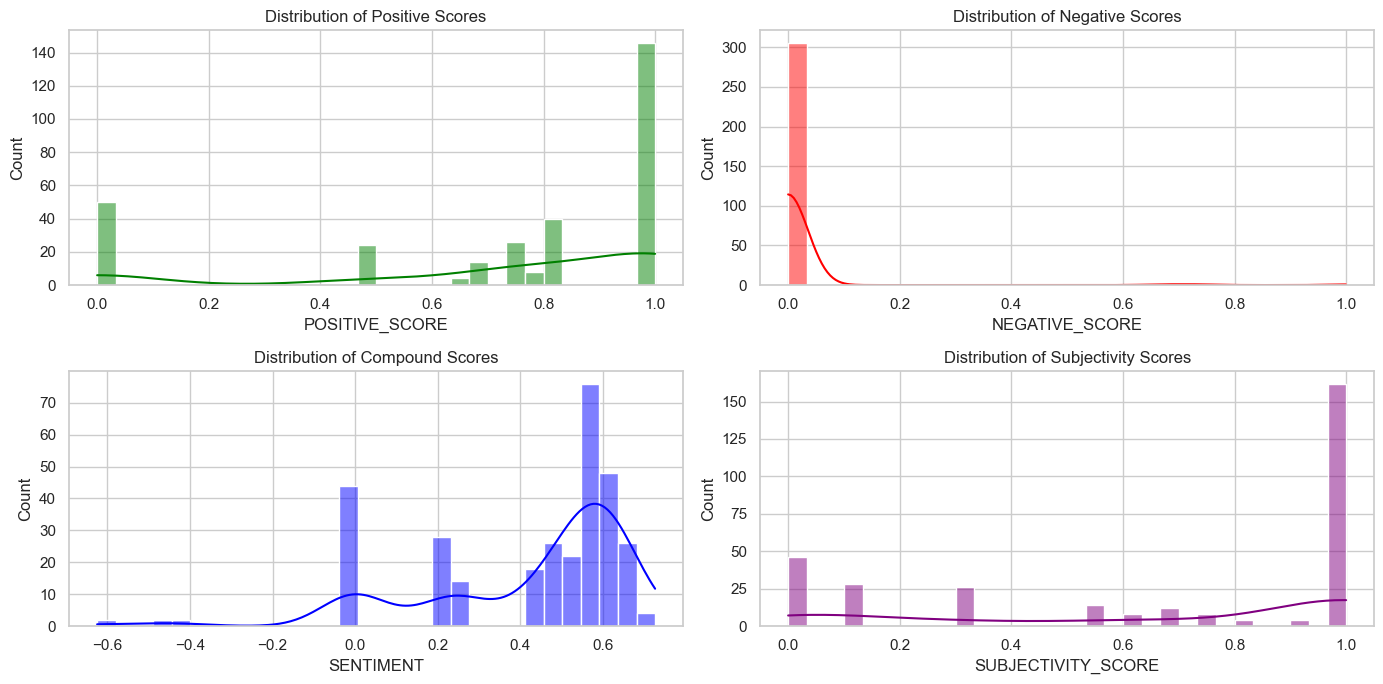

In [53]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set the style of the plots
sns.set(style="whitegrid")

# Plot histogram for sentiment scores (positive, negative, compound)
plt.figure(figsize=(14, 7))

# Plot Positive Score Distribution
plt.subplot(2, 2, 1)
sns.histplot(output_df["POSITIVE_SCORE"], bins=30, kde=True, color='green')
plt.title('Distribution of Positive Scores')

# Plot Negative Score Distribution
plt.subplot(2, 2, 2)
sns.histplot(output_df["NEGATIVE_SCORE"], bins=30, kde=True, color='red')
plt.title('Distribution of Negative Scores')

# Plot Compound Score Distribution
plt.subplot(2, 2, 3)
sns.histplot(output_df["SENTIMENT"], bins=30, kde=True, color='blue')
plt.title('Distribution of Compound Scores')

# Plot Subjectivity Score Distribution
plt.subplot(2, 2, 4)
sns.histplot(output_df["SUBJECTIVITY_SCORE"], bins=30, kde=True, color='purple')
plt.title('Distribution of Subjectivity Scores')

plt.tight_layout()
plt.show()

C:\Users\SUPRA\AppData\Local\Temp\ipykernel_24244\2583501039.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=output_df, x='SENTIMENT_CATEGORY', palette='Set1')


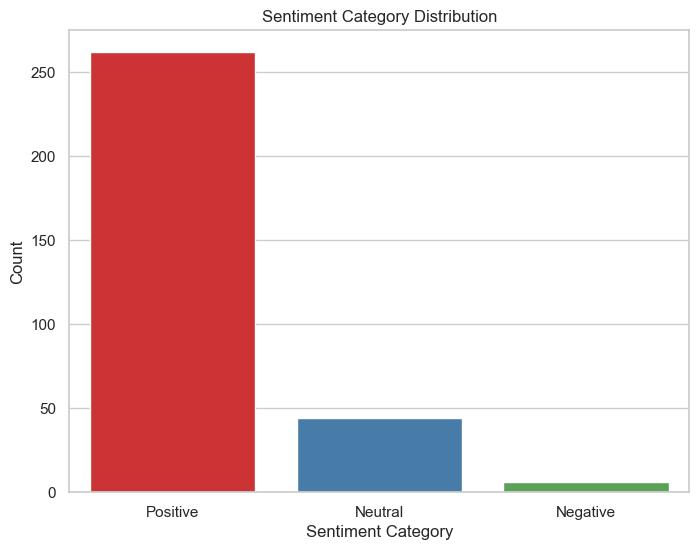

In [55]:
# Categorize sentiment
output_df['SENTIMENT_CATEGORY'] = output_df['SENTIMENT'].apply(
    lambda x: 'Positive' if x > 0 else ('Negative' if x < 0 else 'Neutral')
)

# Plot sentiment counts
plt.figure(figsize=(8, 6))
sns.countplot(data=output_df, x='SENTIMENT_CATEGORY', palette='Set1')
plt.title('Sentiment Category Distribution')
plt.xlabel('Sentiment Category')
plt.ylabel('Count')
plt.show()


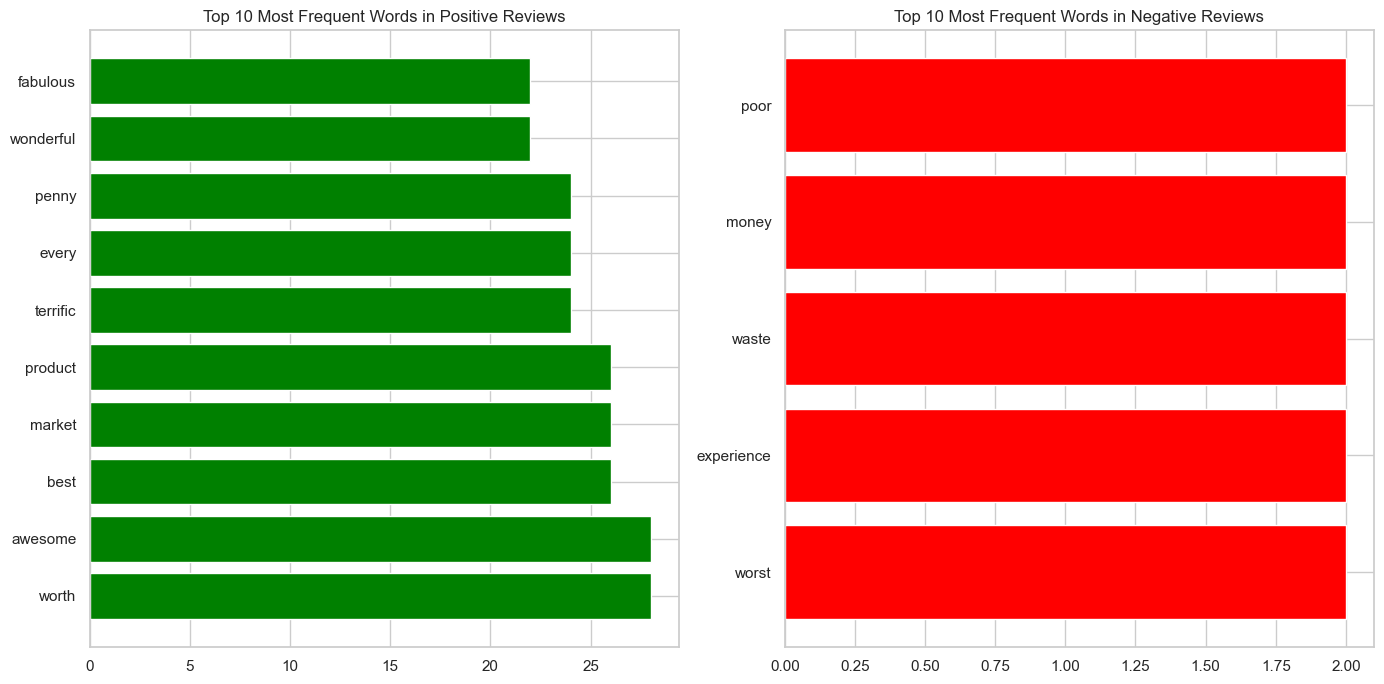

In [63]:
from wordcloud import STOPWORDS
from collections import Counter

# Filter positive and negative reviews
positive_reviews_text = ' '.join(positive_reviews['REVIEWS'].values)
negative_reviews_text = ' '.join(negative_reviews['REVIEWS'].values)

# Tokenize and remove stopwords for positive reviews
positive_words = [word.lower() for word in positive_reviews_text.split() if word.lower() not in STOPWORDS]
negative_words = [word.lower() for word in negative_reviews_text.split() if word.lower() not in STOPWORDS]

# Get the top 10 frequent words
positive_word_counts = Counter(positive_words).most_common(10)
negative_word_counts = Counter(negative_words).most_common(10)

# Plotting the most common words
fig, axes = plt.subplots(1, 2, figsize=(14, 7))

# Plot positive word cloud
axes[0].barh([x[0] for x in positive_word_counts], [x[1] for x in positive_word_counts], color='green')
axes[0].set_title('Top 10 Most Frequent Words in Positive Reviews')

# Plot negative word cloud
axes[1].barh([x[0] for x in negative_word_counts], [x[1] for x in negative_word_counts], color='red')
axes[1].set_title('Top 10 Most Frequent Words in Negative Reviews')

plt.tight_layout()
plt.show()

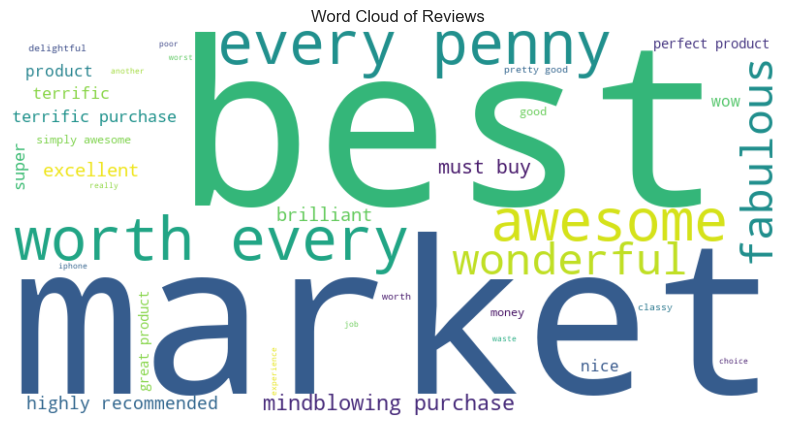

In [58]:
from wordcloud import WordCloud

# Combine all reviews into one large string
all_reviews_text = ' '.join(output_df['REVIEWS'].values)

# Generate word cloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(all_reviews_text)

# Plot the word cloud
plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud of Reviews')
plt.show()

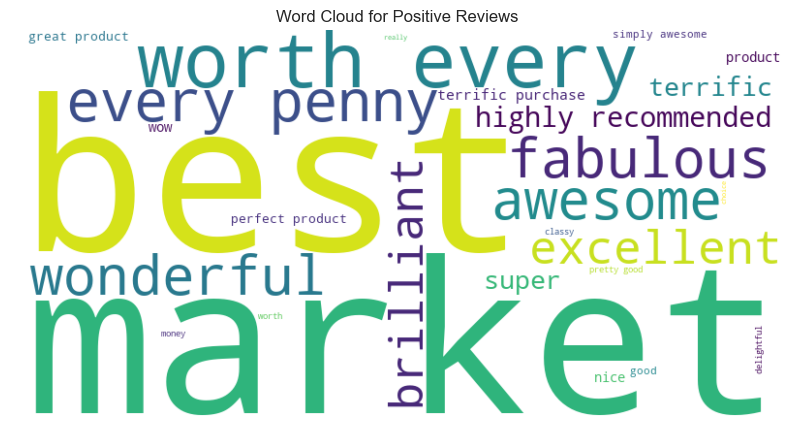

In [74]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Filter positive reviews based on sentiment score (greater than 0)
positive_reviews = output_df[output_df['SENTIMENT'] > 0]['REVIEWS']

# Combine the positive reviews into a single string
positive_reviews_text = ' '.join(positive_reviews.values)

# Generate word cloud for positive reviews
positive_wordcloud = WordCloud(width=800, height=400, background_color='white').generate(positive_reviews_text)

# Plot the positive word cloud
plt.figure(figsize=(10, 6))
plt.imshow(positive_wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud for Positive Reviews')
plt.show()

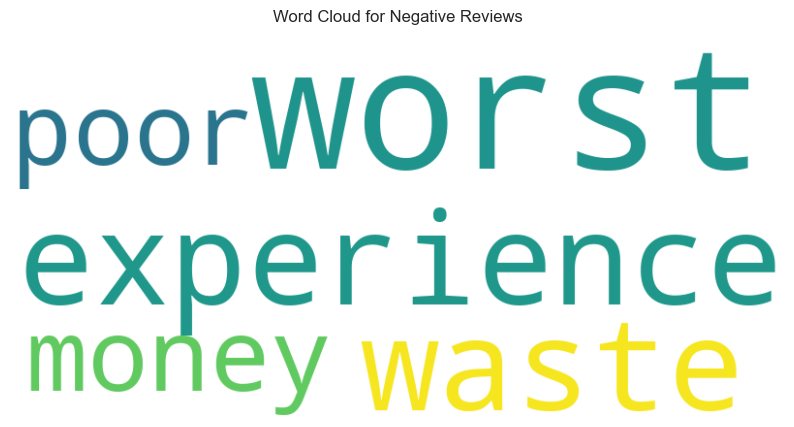

In [75]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Filter negative reviews based on sentiment score (less than 0)
negative_reviews = output_df[output_df['SENTIMENT'] < 0]['REVIEWS']

# Combine the negative reviews into a single string
negative_reviews_text = ' '.join(negative_reviews.values)

# Generate word cloud for negative reviews
negative_wordcloud = WordCloud(width=800, height=400, background_color='white').generate(negative_reviews_text)

# Plot the negative word cloud
plt.figure(figsize=(10, 6))
plt.imshow(negative_wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud for Negative Reviews')
plt.show()

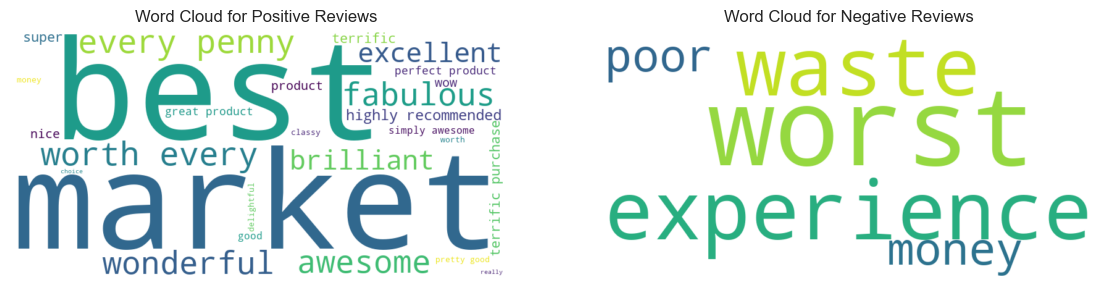

In [85]:
positive_reviews = output_df[output_df['SENTIMENT'] > 0]['REVIEWS']
negative_reviews = output_df[output_df['SENTIMENT'] < 0]['REVIEWS']

positive_reviews_text = ' '.join(positive_reviews.values)
negative_reviews_text = ' '.join(negative_reviews.values)

# Generate word cloud for positive reviews
positive_wordcloud = WordCloud(width=800, height=400, background_color='white').generate(positive_reviews_text)

# Generate word cloud for negative reviews
negative_wordcloud = WordCloud(width=800, height=400, background_color='white').generate(negative_reviews_text)

# Plot the word clouds side by side
plt.figure(figsize=(14, 8))

# Plot Positive Word Cloud
plt.subplot(1, 2, 1)
plt.imshow(positive_wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud for Positive Reviews')

# Plot Negative Word Cloud
plt.subplot(1, 2, 2)
plt.imshow(negative_wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud for Negative Reviews')

plt.show()